# Why scikit learn ( sklearn )
* It is based on numpy and matplotlib
* Inbuilt machine learning models
* Methods to evaluate our model
* Very good api

* At the end of the day ml model is just a computer writing its own function based on the input and desired output we feed it.

* Machine learning is all about experimentation till you hit the sweet spot with your model / data .

### The below Introduction includes

0. An end to end scikit learn workflow
1. Getting the data ready 
2. Chosing the right estimator / algorithm for your data 
3. Fitting your data in the model
4. evalutaing your model
5. Tuning your model 
6. Saving / Loading the model for furture use 
7. Put all in together

# 0. End to End Scikit Learn Workflow 

### 1. Getting the Data ready 

In [1]:
# Standard Imports 

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Creat X ( Features matrix for the data - The coloumns which we ll use to make predictions )
X = heart_disease.drop("target",axis=1)    # Drop every column except target and store in x , axis 1 here is column names

# Creat y ( labels - that we need to predict  )
y = heart_disease["target"]

### 2. Choosing the right estimator / algorithm and parameters for out data

In [6]:
# Since we have a classification problem we take random forest just to test things out 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We keep the default hyperparameters for the time being 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fit the data to the training model

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .2) # Splits the data into 80% Train 20% Test

In [12]:
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2


In [13]:
X_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3


In [10]:
clf.fit(X_train , y_train);  # Fitting the data into our model 

In [16]:
# Making the prediction 

y_label = clf.predict(np.array([0,1,2,3,4,]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
# Now the above code ran error because we are trying to test a data that doesnot look even close to the data we trained model on

# The test data should look like 

X_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3


In [18]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [19]:
y_test

21     1
193    0
212    0
33     1
91     1
      ..
157    1
155    1
52     1
31     1
283    0
Name: target, Length: 61, dtype: int64

In [20]:
# Checking the score of our model on Training data  ( The score will be 1 as it had y label to correct itself with )

clf.score(X_train , y_train)

1.0

In [21]:
# Checking the score of our model on Test Data  ( Data the model never saw )

clf.score(X_test , y_test)

0.8360655737704918

In [24]:
# Importing more metrics to gets better overview of our result 

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test , y_preds))   # Comparing the actual label we hid to the prediction made

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.87      0.87      0.87        39

    accuracy                           0.84        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.84      0.84      0.84        61



In [25]:
confusion_matrix(y_test , y_preds)

array([[17,  5],
       [ 5, 34]], dtype=int64)

In [26]:
accuracy_score(y_test , y_preds)

0.8360655737704918

### 4. Fine tuning our model

In [ ]:
# Trying different amount of n_estimators ( A hyperparameter of randomforest)

In [33]:
np.random.seed(42)

for i in range ( 10 , 110 , 10 ):               # From 10 to 100 At the gap of 10
    print(f" Trying the model with {i} n_estimator")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f" The accuracy with {i} n_estimators is {clf.score(X_test , y_test)} ")
    


 Trying the model with 10 n_estimator
 The accuracy with 10 n_estimators is 0.7868852459016393 
 Trying the model with 20 n_estimator
 The accuracy with 20 n_estimators is 0.7868852459016393 
 Trying the model with 30 n_estimator
 The accuracy with 30 n_estimators is 0.7704918032786885 
 Trying the model with 40 n_estimator
 The accuracy with 40 n_estimators is 0.8360655737704918 
 Trying the model with 50 n_estimator
 The accuracy with 50 n_estimators is 0.8032786885245902 
 Trying the model with 60 n_estimator
 The accuracy with 60 n_estimators is 0.7540983606557377 
 Trying the model with 70 n_estimator
 The accuracy with 70 n_estimators is 0.7868852459016393 
 Trying the model with 80 n_estimator
 The accuracy with 80 n_estimators is 0.819672131147541 
 Trying the model with 90 n_estimator
 The accuracy with 90 n_estimators is 0.819672131147541 
 Trying the model with 100 n_estimator
 The accuracy with 100 n_estimators is 0.819672131147541 


### 5. Save the Model 

In [37]:
# We will save the model using a library called pickle

import pickle 

pickle.dump(clf , open("Randomforsetclass1.pkl" , "wb"))   # Write binary


In [41]:
# Loading a model 
loaded_model = pickle.load(open("Randomforsetclass1.pkl" , "rb"))   # Read binary

In [43]:
loaded_model.score(X_test,y_test)

0.819672131147541

## GETTING THE DATA READY TO BE USED IN SCIKIT LEARN

Three Things that we need to do here is 

    1. Splitting the data into Features and Labels ( ' X ' for features and 'y' for labels )
    
    2. Filling in ( also called imputing ) or disregarding missing values 
    
    3. Converting non numerical values into numerical values  

In [2]:
# Importing the data 
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Making the Feature Matrix

X = heart_disease.drop("target" , axis = 1)

# Making label

y = heart_disease["target"]

In [4]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [14]:
X.shape , X_train.shape , X_test.shape

((303, 13), (242, 13), (61, 13))

### 1.1 Making data all numerical

In [2]:
# Importing new dataset

car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
len(car_sales)

1000

In [6]:
car_sales.dtypes , type(car_sales) , car_sales.shape

(Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object,
 pandas.core.frame.DataFrame,
 (1000, 5))

In [7]:
# Note :- You cannot fit this data to the ml algo as its not all numerical data , MAKE AND COLOUR are of type object ( String )

# Lets try to do it 

    # Splitting into X / y

X = car_sales.drop("Price" , axis  = 1)
y = car_sales["Price"]

In [8]:
# Making Train and Test splits

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [10]:
# Importing RF REGRESSOR

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# SO as we can see we have the error as above

In [16]:
# So lets make the data Numerical

        # Turning categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make" , "Colour" ,"Doors"]   # Door since we can classify as 4 door 5 door 3 door 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("OneHot",one_hot,categorical_feature)],remainder="passthrough") # Takes a tuple inside a list of name , encoder and categories and remainder outside the list 

X_transformed = transformer.fit_transform(X)
X_transformed

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(X_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [30]:
# Another way of doing it is using pandas

dumies = pd.get_dummies(car_sales[["Make" , "Doors" , "Colour"]])
dumies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [29]:
# Refitting the data in the model
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_transformed , y , test_size = 0.2)


model.fit(X_train,y_train)
model.score(X_test,y_test)

0.23280704478691716

#### What if we have missing data 
    * Solve by removing the sample
    * Fill it with good values mostly average

In [7]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [8]:
# Seeing how many we have missing
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [9]:
# Splitting into X/y

X = car_sales_missing.drop("Price" , axis = 1 )
y = car_sales_missing["Price"]
X.head() , y.head()

(     Make Colour  Odometer (KM)  Doors
 0   Honda  White        35431.0    4.0
 1     BMW   Blue       192714.0    5.0
 2   Honda  White        84714.0    4.0
 3  Toyota  White       154365.0    4.0
 4  Nissan   Blue       181577.0    3.0,
 0    15323.0
 1    19943.0
 2    28343.0
 3    13434.0
 4    14043.0
 Name: Price, dtype: float64)

In [5]:
# Converting the data to numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ["Make" , "Colour" , "Doors" ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One Hot",one_hot,categorical_columns)] , remainder="passthrough")

X_transformed = transformer.fit_transform(X)
X_transformed
pd.DataFrame(X_transformed).head()

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


In [6]:
type(X_transformed)

scipy.sparse.csr.csr_matrix

##### Option 1 : Fill missing data with pandas

In [7]:
# Filling the Make column

car_sales_missing["Make"].fillna("missing",inplace=True)

# Filling the colour column

car_sales_missing["Colour"].fillna("missing",inplace=True)

# Filling the Odometer column

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

In [8]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [9]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [10]:
# Filling the Doors column

car_sales_missing["Doors"].fillna(4,inplace=True)

In [11]:
# Left out the price as we want to remove those samples from our dataset

car_sales_missing.dropna(inplace=True)
car_sales_missing.tail(10)

,Make,Colour,Odometer (KM),Doors,Price
990,Toyota,White,173408.0,4.0,8082.0
991,Honda,Blue,235985.0,4.0,9184.0
992,Honda,Green,54721.0,4.0,27419.0
993,Nissan,Black,162523.0,4.0,4696.0
994,BMW,Blue,163322.0,3.0,31666.0
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [12]:
len(car_sales_missing)

950

In [13]:
# Resplitting them

X = car_sales_missing.drop("Price" , axis = 1)
y = car_sales_missing["Price"]

In [14]:
# Converting the data again

transformer = ColumnTransformer([("OneHot" , one_hot , categorical_columns)] , remainder = "passthrough")

X_transformed = transformer.fit_transform(car_sales_missing)
X_transformed

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2 : Using sklearn

In [10]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [11]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [12]:
# REmoving no price samples

car_sales_missing.dropna(subset=["Price"] , inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [13]:
# Spliting into X & y

X = car_sales_missing.drop("Price" , axis = 1) 
y = car_sales_missing["Price"]


In [16]:
# Fill missing balues with scikit learn 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with " Missing " and numerical values with " mean "

cat_imputer = SimpleImputer(strategy = "constant" , fill_value = "missing")   # Constantly fill them with missing value
door_imputer = SimpleImputer(strategy = "constant" , fill_value = 4) 
num_imputer = SimpleImputer(strategy = "mean")

# Defining the columns 

cat_features = ["Make" , "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer ( Something that fills the missing value )

imputer = ColumnTransformer([
    ("cat_imputer" , cat_imputer , cat_features) , # Name we define of imputer , the imputer and on which we want to apply imputer
    ("door_imputer" , door_imputer , door_features),
    ("num_imputer" , num_imputer , num_features)
])

# Transforming the data

filled_X  = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [17]:
# To view it efficiently we tranform it into df

car_sales_filledna = pd.DataFrame(filled_X,
                                  columns = ["Make", "Colour" , "Odometer (KM)" , "Doors"])
car_sales_filledna.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [18]:
car_sales_filledna.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [23]:
# Making it into numbers  

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ["Make" , "Colour" , "Doors" ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One Hot",one_hot,categorical_columns)] , remainder="passthrough")

X_transformed = transformer.fit_transform(car_sales_filledna)
X_transformed

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [30]:
# Lets fit a model now 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_transformed, y , test_size  = 0.2)


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train , y_train)
model.score(X_test , y_test)

-0.05571224106433825

### Choosing right estimator / algorithm for our problems

#### 2.1 Picking machine learning machine model for regression problems

In [40]:
# Importing the boston house dataset

from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [49]:
# Converting into pandas dataframe

boston_df = pd.DataFrame(boston["data"] , columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
# How many samples 
len(boston_df)

506

In [51]:
# Is there any missing data 
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [52]:
# NO missing data ( Thats good )

In [62]:
# Lets try the ridge regression model

np.random.seed(42)
from sklearn.linear_model import Ridge

model = Ridge()

# splitting the data 

X = boston_df.drop("target" , axis = 1)
y = boston_df["target"]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

model.fit(X_train , y_train)
model.score(X_test , y_test)

0.6662221670168518

In [63]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

##### What if ridge regression was not working 

* Always prefer to refer the map :- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [64]:
# Using the Random Forest Regressor 

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Splitting the data yet again

X = boston_df.drop("target" , axis = 1)
y = boston_df["target"]

# Making the test split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 )

# Sumonning the model 
rf  = RandomForestRegressor()

# Feeding the data 
rf.fit(X_train , y_train)

# Getting the score 
rf.score(X_test , y_test)

0.8654448653350507

In [66]:
# Comparing the scores 

model.score(X_test , y_test) , rf.score(X_test , y_test)

(0.6662221670168518, 0.8654448653350507)

#### 2.2 Picking machine learning estimator for classification problem

In [3]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(heart_disease)

303

In [8]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# Map suggested Linear SVC hence we ll import Linear SVC

from sklearn.svm import LinearSVC

# Setting up the seed value to recreate the results 
np.random.seed(42)

# Splitting the data in X and y 

X = heart_disease.drop("target" , axis = 1)

y = heart_disease["target"]



In [9]:
# Making the test splits 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Fitting the data 

model = LinearSVC()
model.fit(X_train , y_train)
model.score(X_test,y_test)

C:\Users\ndahr\Desktop\DSC\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

##### Lets suppose LinearSVC is not working upto the mark

In [11]:
# Lets use RandomForestClassifier

np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()

# Again splitting the data into X , y 

X = heart_disease.drop("target" , axis = 1)

y = heart_disease["target"]

# Making the test splits 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Fitting the data to the rf model

rf.fit(X_train , y_train)
rf.score(X_test , y_test)


0.8524590163934426

In [12]:
# Comparing the scores 

model.score(X_test,y_test) , rf.score(X_test , y_test)

(0.8688524590163934, 0.8524590163934426)

In [15]:
# Using n_estimator 
np.random.seed(42)
for i in range (10, 100 , 10):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train , y_train)
    print(f"The for n_estimator = {i} is :- {rf.score(X_test , y_test)}")

The for n_estimator = 10 is :- 0.8524590163934426
The for n_estimator = 20 is :- 0.8032786885245902
The for n_estimator = 30 is :- 0.8360655737704918
The for n_estimator = 40 is :- 0.8032786885245902
The for n_estimator = 50 is :- 0.8688524590163934
The for n_estimator = 60 is :- 0.8360655737704918
The for n_estimator = 70 is :- 0.8360655737704918
The for n_estimator = 80 is :- 0.8360655737704918
The for n_estimator = 90 is :- 0.819672131147541


In [16]:
np.random.seed(42)
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train , y_train)
rf.score(X_test , y_test)

0.8688524590163934

### *Use Ensemble method on well structured data
### * Use Deep Learning or tranfer learning for unstructed data

#### 3. Fit the Data / Algorithm and use it to make predictions 
        
  ##### 3.1 Fitting the data 

###### Different names for :
      * 'X' = Features , Feature variable , data
      * 'y' = Labels , Target variables , Target

In [18]:
# Lets use RandomForestClassifier

np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()

# Again splitting the data into X , y 

X = heart_disease.drop("target" , axis = 1)

y = heart_disease["target"]

# Making the test splits 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Fitting the data to the rf model  ( Training the model and letting it learn patterns in the data) 

rf.fit(X_train , y_train)

# Evaluatio the model ( Testing the model on the test data using its already learnt patterns from the train data )

rf.score(X_test , y_test) # Predicting the y_test on its own and matching it with given y_test 


0.8524590163934426

##### 3.2 Using the Trained model to make predictions 

We have two options to make predictions over here:
>1. ` predict()`
>2. `predict_proba()`

###### OPTION 1 : Using the `predict()` funciton

In [21]:
rf.predict(np.array([1,2,3,4,5,6,7]))  # This code wont work (  Expected 2D array, got 1D array instead )

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6. 7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
# The predict function takes input same as feature varaibles 

rf.predict(X_test)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [23]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [24]:
# Converting the y_test column to np array to comapre with X_test predictions 

np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
# Comparing the predictions to the truth labels (y_test)

y_preds = rf.predict(X_test)    # Outputs on the 0 / 1 on the basis of pattern learnt

np.mean(y_preds == y_test)


0.8524590163934426

In [32]:
y_preds , print(" \n") , y_test

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 None,
 179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64)

In [33]:
rf.score(X_test,y_test)

0.8524590163934426

In [34]:
# WE can see the above two numbers are same only difference is we did it manually 

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_preds , y_test)

0.8524590163934426

In [36]:
# So here we see three different ways to do the same thing i.e predicting the output 


###### OPTION 2 : Using the `predict_proba()` funciton

In [40]:
rf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [41]:
rf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [46]:
# So `predict_proba()` return probability of classification labels or classes , here classes are `Heart_disease or not`
# Hence the model classifies it as one thing or another for the one which has higher probability 
# Its saying the first sample in X_test has .89 probability of being 0 hence i ll predict that as not heart disease
# Its useful when we want great confidence on the predcition or when we want to diagnose why a sample has low probability of class
# MAX VALUE IS = 1.0

##### 3.3 Using the Trained model to make predictions on regression model 


In [4]:
# Loading the boston dataset

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
# Converting it into pandas data frame

boston_df = pd.DataFrame(boston["data"] , columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# Initiating the model
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Splitting the data into x and y 

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Making the test split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

# Feeding the data to the model

rf.fit(X_train,y_train) # can be written as rf = RandomForestRegressor().fit(X_train,y_train)

# Score

rf.score(X_test , y_test)

0.8654448653350507

In [14]:
# Predict()

y_preds = rf.predict(X_test) # Type ndarray
y_preds[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [18]:
y_test[:5]  # Type series

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

In [20]:
np.array(y_test[:5]) , y_preds[:5]

(array([23.6, 32.4, 13.6, 22.8, 16.1]),
 array([23.081, 30.574, 16.759, 23.46 , 16.893]))

In [21]:
# Comparing the prediction to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

In [22]:
mean_absolute_error(y_preds,y_test)

2.136382352941176

#### 4. Evaluating our model

There are three ways to evalute your machine learning model

        * 1. Estimator `score` method
    
        * 2. The `scoring` parameter
        
        * 3. Problem-specific metric function.
        
https://scikit-learn.org/stable/modules/model_evaluation.html

##### 4.1 Using Estimator `score` Method

In [29]:
np.random.seed(42)
# Importing the data 

heart_disease = pd.read_csv("Data/heart-disease.csv")

# Splitting the data into X , y 

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

# Splitting the data into test split

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Instantiating the model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train , y_train)

In [30]:
rf.score(X_train,y_train)

1.0

In [31]:
rf.score(X_test,y_test)

0.8524590163934426

In [32]:
# For regression problem

In [33]:
# Initiating the model
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Splitting the data into x and y 

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Making the test split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

# Feeding the data to the model

rf.fit(X_train,y_train) # can be written as rf = RandomForestRegressor().fit(X_train,y_train)

RandomForestRegressor()

In [34]:
# Score

rf.score(X_test , y_test)

0.8654448653350507

In [35]:
# Score function has default evaluation metrics for every specific model
# For eg, rf classifier has accuracy rf regressor has coefficient of determination 

##### 4.2 Using `scoring` parameter  Method

In [37]:
np.random.seed(42)
# Importing the data 

heart_disease = pd.read_csv("Data/heart-disease.csv")

# Splitting the data into X , y 

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

# Splitting the data into test split

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Instantiating the model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train , y_train)

In [38]:
rf.score(X_test , y_test)

0.8524590163934426

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [41]:
cross_val_score(rf , X , y , cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

![](KCV.png)

In [43]:
# What cross validation does is it goes through iteration making different splits in the same data
# It helps us rule out the chances of lucky data training and gives us a unbaised score
# Helps train on all data and test on all data 

In [44]:
# Default 5-Fold Cross Validation Score
cross_val_score(rf,X,y)

array([0.85245902, 0.8852459 , 0.81967213, 0.8       , 0.78333333])

In [47]:
cross_val_score(rf,X,y).mean()

0.8018032786885245

In [ ]:
# Default scoring parameter of classifier is = > mean accuracy 

In [46]:
np.random.seed(42)
# Single split score 
rf_single = rf.score(X_test, y_test)

# Cross validation score 
rf_cv = np.mean(cross_val_score(rf , X , y , cv = 5))    # Takes model , X data , y data and fold count ( k - fold ) as arguement

# Comapring the two
rf_single , rf_cv 

(0.8524590163934426, 0.8248087431693989)

In [48]:
# When scoring is set to none it uses default scoring parameter

cross_val_score(rf , X , y ,scoring = None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

##### 4.2.1 Classification model evaluation metrics

1. Accuracy 
2. Area under ROC curve 
3. Confusion matrix 
4. Classification report

###### Accuracy

In [53]:
np.random.seed(42)
X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train , y_train)

from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(rf , X , y , cv = 5)

print(f"Heart Disease classifier accuracy is {np.mean(cross_val_score)*100:.2f}%")


Heart Disease classifier accuracy is 81.16%


##### ** Area under the reciver operating curve characteristic ( AUC / ROC )**
* Area under curve  ( AUC )
* ROC

Roc curves are comparision of a models true postive rate ( tpr ) vs false postiive rate ( fpr )

* True positive :- When model predicts 1 when truth is 1
* False positive :- When model predicts 1 when truth is 0
* True negetive :- When model predicts 0 when truth is 0
* False negetive :- When model predicts 0 when truth is 1

In [2]:
np.random.seed(42)
# Making the model 

heart_disease = pd.read_csv("Data/heart-disease.csv")

# Making X , y

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

# Splitting the data 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2)

# Instantiating the model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fitting the data 
rf.fit(X_train , y_train)

# Using the ROC curve

from sklearn.metrics import roc_curve

# Making the prediction with probability 

y_probs = rf.predict_proba(X_test)
y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [3]:
# Now we only want the positive ones as roc uses them 

y_probs_postive = y_probs[: , 1]
y_probs_postive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [4]:
# Calculate fpr , tpr , threshold

fpr , tpr , threshold = roc_curve(y_test,y_probs_postive)

# Check the false positive rate

fpr , len (fpr)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
        0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ]),
 25)

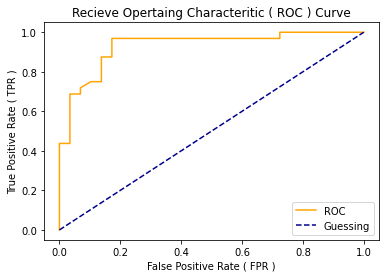

In [5]:
# Creating a function for plotting ROC curve for us 

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
    Plots the roc curve given False Positive Rate ( fpr )  and True postive rate ( tpr ) for the model
    '''
    
    # Making the plot 
    
    plt.plot(fpr , tpr , color="orange" , label = "ROC")
    plt.plot([0,1] , [0,1] , color="darkblue" , label = "Guessing" , linestyle = "--")
    
    # Customising the plot
    
    plt.xlabel("False Positive Rate ( FPR )")
    plt.ylabel("True Positive Rate ( TPR )")
    plt.title("Recieve Opertaing Characteritic ( ROC ) Curve")
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr,tpr)

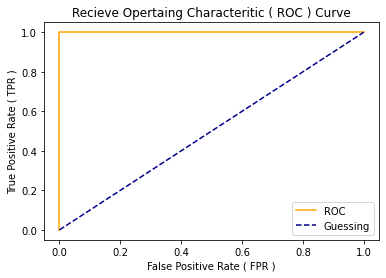

In [6]:
# What a perfect ROC curve look like

fpr , tpr , threshold = roc_curve(y_test , y_test)

plot_roc_curve(fpr , tpr)

##### ** Confusion Matrix **

A Confusion Matrix is a quick way to compare the label predicted by the model and the label it should have been predicted and get and idea where the model is getting confused.

In [7]:
from sklearn.metrics import confusion_matrix

y_preds = rf.predict(X_test)
y_preds[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [8]:
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [9]:
# Making our confusion matrix readable using pd.crosstab()

pd.crosstab(y_test,y_preds,
            rownames=["Actual Prediction"],
            colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Prediction,,
0,24,5
1,4,28


In [10]:
# So here the diagonal left \ are the True pos and neg [ Correct ] where as the diagonal right / are the False pos and neg [ Incorrect ]

In [11]:
# Making it more visual with SEABORNE HEATMAP ( ANOTHER PLOTTING LIBRARY BUILT ON MATPLOT)

import seaborn as sns

In [12]:
# Installing modules right away from your nore book ( NOTE :- ! Stands for execute in bash)

import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



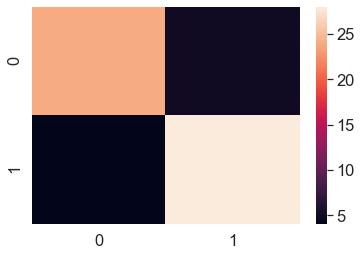

In [13]:
# Making it more visual 

import seaborn as sns

# Set font scale 
sns.set(font_scale = 1.5)

# Making the confusion matrix

conf_mat = confusion_matrix(y_test,y_preds)

# Plotting using seaborn

sns.heatmap(conf_mat);

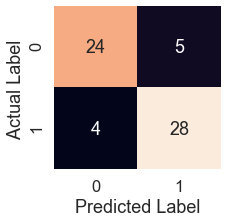

In [14]:
# Making It look more communicative 

def plot_conf_mat(conf_mat):
    fig , ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat , 
                    annot = True , # Annotate the boxes with conf_mat info
                    cbar = False)
    plt.xlabel(" Predicted Label ")
    plt.ylabel(" Actual Label ")
    plt.show()
    
plot_conf_mat(conf_mat)

In [15]:
24 + 5 + 4 + 28

61

In [16]:
len(y_test)

61

In [17]:
len(y_preds)

61

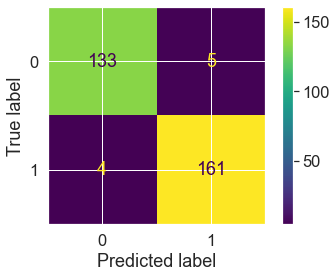

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf,X,y)

##### ** Classification Report **

video 31

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



![](Classification_report.png)

In [24]:
# This is where precision and recall becomes valuable 

disease_true = np.zeros(1000)
disease_true[0] = 1 # Only one positive case

# Simulating a model where all the test case are predicted as 0

disease_preds = np.zeros(1000)

pd.DataFrame(classification_report(disease_true , 
                            disease_preds , 
                            output_dict=True,
                            zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


#### 4.2.2 Regression Model Evaluation Metrics

1. R^2 ( R - Squared or Coefficient Of Determination )
2. Mean Absolute Error ( MAE )
3. Mean Squared Error ( MSE )

**R^2**
Compares your model prediction to the mean of the target. Values can range from negetive infinity ( very poor model ) to 1
If you model only predicts mean of the target then its R^2 value is 0 
If it is good at predicting a range of numbers then its R^2 value is closer to 1

In [48]:
# Loading the Dataset

from sklearn.datasets import load_boston
boston = load_boston()
boston

# Converting it into pandas data frame

boston_df = pd.DataFrame(boston["data"] , columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()


# Initiating the model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Splitting the data into x and y 

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Making the test split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

# Feeding the data to the model

rf.fit(X_train,y_train); # can be written as rf = RandomForestRegressor().fit(X_train,y_train)


In [49]:
# Score

rf.score(X_test , y_test)

0.8654448653350507

In [50]:
# Seeing R^2 metric in action 

from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test) , y_test.mean())

In [62]:
y_test_mean[:5] , y_test[:5]

(array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529]),
 173    23.6
 274    32.4
 491    13.6
 72     22.8
 452    16.1
 Name: target, dtype: float64)

In [60]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [61]:
r2_score(y_test,y_test) # How close it is to the test labels

1.0

**MEAN ABSOLUTE ERROR**

Average of difference between our prediction and actual values of the data . Absolute means it converts the negetive difference to postivie.

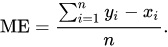

In [64]:
from sklearn.metrics import mean_absolute_error

y_preds = rf.predict(X_test)

mean_absolute_error(y_test,y_preds)

2.136382352941176

In [76]:
df = pd.DataFrame(data={"actual value":y_test , "predicted value ":y_preds , "Difference":y_test-y_preds})
df
# Difference is averaged after taking mod 

,actual value,predicted value,Difference
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


**MEAN SQUARED ERROR**

Just like MAE , takes the individual difference , Squares it up and then takes an average 


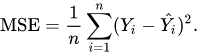

In [72]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_preds)

9.867437068627442

In [78]:
# Calculating MSE by hand

np.square(df["Difference"]).mean()

9.867437068627439

![](Images\REG_METRIC.png)

In [79]:
# Minimise MSE AND MAE and MAXIMISE R^2

#### 4.2.3 Finally using `Scoring` Parameter

In [89]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("Data/heart-disease.csv")

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

rf = RandomForestClassifier()

In [90]:
cv_default = cross_val_score(rf , X , y , scoring=None)
cv_default.mean() , cv_default

(0.8248087431693989,
 array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]))

In [92]:
np.random.seed(42)
cv_acc = cross_val_score(rf,X,y,scoring="accuracy")
cv_acc.mean()

0.8248087431693989

In [93]:
np.random.seed(42)
cv_precision = cross_val_score(rf,X,y,scoring="precision")
np.mean(cv_precision)

0.8329547346025924

In [94]:
np.random.seed(42)
cv_recall = cross_val_score(rf,X,y,scoring="recall")
np.mean(cv_recall)

0.8545454545454545

In [95]:
np.random.seed(42)
cv_f1 = cross_val_score(rf,X,y,scoring="f1")
np.mean(cv_f1)

0.8426854603423346

How about Regression Model

In [96]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = boston_df.drop("target" , axis = 1)
y = boston_df["target"]

rf = RandomForestRegressor()
rf.score()
# Default is r2 for this regressor

In [100]:
cv_r2 = cross_val_score(rf,X,y)
cv_r2.mean()

0.6252085974363598

In [107]:
# Neg because All scorer objects follow the convention that higher return values are better than lower return values
# So since we need to follow higher value is better scheme , mae and mse are neg as we need to lower them close to 0
# They show how spread out each prediction is on avg to the actual value 

cv_mae = cross_val_score(rf,X,y,scoring="neg_mean_absolute_error")
cv_mae

array([-2.10456863, -2.65724752, -3.31214851, -3.79687129, -3.31455446])

In [108]:
cv_mse = cross_val_score(rf,X,y,scoring="neg_mean_squared_error")
cv_mse

array([ -8.02002688, -13.65363797, -20.70354283, -45.29497979,
       -18.83601079])

video 37

#### 4.3 Using different evaluation metrics as Sci-kit learn Functions

**Classification Evaluation Metrics**

In [13]:
np.random.seed(42)

# Making the model

heart_disease = pd.read_csv("Data/heart-disease.csv")

# Splitting into X and y

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

# Splitting into training and test

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)

# Importing the model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train , y_train)

# Evaluation metrics functions 

from sklearn.metrics import accuracy_score , recall_score , f1_score , precision_score

# Making predictions 

y_preds = clf.predict(X_test)

# Evaluation Scores 

print(f"Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Recall : {recall_score(y_test,y_preds):.2f}")
print(f"F1_score : {f1_score(y_test,y_preds):.2f}")
print(f"Precision : {precision_score(y_test,y_preds):.2f}")

Accuracy : 85.25%
Recall : 0.88
F1_score : 0.86
Precision : 0.85


**Regression Model Metrics**


In [14]:
np.random.seed(42)

# Making a regression model 

from sklearn.datasets import load_boston
boston = load_boston()

# Boston Dataset

boston_df = pd.DataFrame(boston["data"] , columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
np.random.seed(42)

# Making X and y splits

X = boston_df.drop("target" , axis  = 1)
y = boston_df["target"]

# Making the training the the test splits 

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2)

# Calling the model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit( X_train , y_train )

# Making the predictions 

y_preds = rf.predict(X_test)

# Evaluation Metrics Functions 

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
print(f"R Square Metrics : {r2_score(y_test,y_preds):.2f}")
print(f"MAE : {mean_absolute_error(y_test,y_preds):.2f}")
print(f"MSE : {mean_squared_error(y_test,y_preds):.2f}")


R Square Metrics : 0.87
MAE : 2.14
MSE : 9.87


### 5. Improving Machine learning Models 

First predictions = baseline predictions. 

First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?


From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?
* Hyperparameters vs. Parameters

Parameters = model find these patterns in data

Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust hyperparameters:

* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [16]:
# Seeing the parameters 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 5.1 Tunning the model " BY HAND "

* When the concept of hyperparameter tunning is introduced it brings a validaiton split with itself


We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [17]:
# Making a Function for all the classification metrics we need

from sklearn.metrics import accuracy_score , recall_score , f1_score , precision_score

def clf_predict(y_true , y_preds):
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    
    # Cant use :.2f here
    
    metric_dict = {"Accuracy" : round(accuracy , 2) ,
                   "Precision" : round(precision , 2) ,
                   "Recall" : round(recall , 2) , 
                   "F1" : round(f1 , 2)}
    
    print(f"Accuracy :- {accuracy*100:.2f}")
    print(f"Precision :- {precision:.2f}")
    print(f"Recall :- {recall:.2f}")
    print(f"f1 :- {f1:.2f}")
    
    return metric_dict


In [51]:
# Making the RandomForestClassifier Model

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample( frac = 1 )

# Making the X and y Splits

X = heart_disease_shuffled.drop("target" , axis = 1)
y = heart_disease_shuffled["target"]

# Making the Train , Validation and Test splits manually 

train_split = round(0.7 * len(heart_disease_shuffled))
val_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train , y_train = X[:train_split] , y[:train_split]
X_val , y_val = X[train_split:val_split] , y[train_split:val_split]
X_test , y_test = X[val_split:] , y[val_split:]

# Fitting in the model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train , y_train);

y_preds = clf.predict(X_val)

baseline = clf_predict(y_val , y_preds)

Accuracy :- 82.22
Precision :- 0.81
Recall :- 0.88
f1 :- 0.85


In [19]:
np.random.seed(42)
# Improving the model on Validation Test Splits 

for i in range(10 , 100 ,10):
    print(f"Using {i} NO. of estimators")
    clf_n = RandomForestClassifier(n_estimators = i)
    clf_n.fit(X_train,y_train)
    y_preds = clf_n.predict(X_val)
    
    
    clf_predict(y_val , y_preds)
    print("\n")


Using 10 NO. of estimators
Accuracy :- 82.22
Precision :- 0.84
Recall :- 0.84
f1 :- 0.84


Using 20 NO. of estimators
Accuracy :- 80.00
Precision :- 0.81
Recall :- 0.84
f1 :- 0.82


Using 30 NO. of estimators
Accuracy :- 80.00
Precision :- 0.81
Recall :- 0.84
f1 :- 0.82


Using 40 NO. of estimators
Accuracy :- 80.00
Precision :- 0.83
Recall :- 0.80
f1 :- 0.82


Using 50 NO. of estimators
Accuracy :- 84.44
Precision :- 0.82
Recall :- 0.92
f1 :- 0.87


Using 60 NO. of estimators
Accuracy :- 82.22
Precision :- 0.81
Recall :- 0.88
f1 :- 0.85


Using 70 NO. of estimators
Accuracy :- 86.67
Precision :- 0.85
Recall :- 0.92
f1 :- 0.88


Using 80 NO. of estimators
Accuracy :- 82.22
Precision :- 0.81
Recall :- 0.88
f1 :- 0.85


Using 90 NO. of estimators
Accuracy :- 82.22
Precision :- 0.81
Recall :- 0.88
f1 :- 0.85




In [66]:
# Since the accuracy is more with n_estimators = 70 , we ll use it 
np.random.seed(42)
clf = RandomForestClassifier(n_estimators = 60)
clf.fit(X_train , y_train)

y_preds = clf.predict(X_val)
est_chng = clf_predict(y_val , y_preds)

Accuracy :- 91.11
Precision :- 0.92
Recall :- 0.92
f1 :- 0.92


In [25]:
# Making the RandomForestClassifier Model

heart_disease = heart_disease[:300]
heart_disease_shuffled = heart_disease.sample( frac = 1 )

# Making the X and y Splits

X = heart_disease_shuffled.drop("target" , axis = 1)
y = heart_disease_shuffled["target"]

# Making the Train , Validation and Test splits manually 

train_split = round(0.7 * len(heart_disease_shuffled))
val_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train , y_train = X[:train_split] , y[:train_split]
X_val , y_val = X[train_split:val_split] , y[train_split:val_split]
X_test , y_test = X[val_split:] , y[val_split:]

# Fitting in the model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train , y_train);

y_preds = clf.predict(X_val)

clf_predict(y_val , y_preds)

Accuracy :- 86.67
Precision :- 0.90
Recall :- 0.90
f1 :- 0.90


{'Accuracy': 0.87, 'Precision': 0.9, 'Recall': 0.9, 'F1': 0.9}

In [24]:
for i in range(10 , 100 ,10):
    print(f"Using {i} NO. of estimators")
    clf_n = RandomForestClassifier(n_estimators = i , random_state=1)
    clf_n.fit(X_train,y_train)
    y_preds = clf_n.predict(X_val)
    
    
    clf_predict(y_val , y_preds)
    print("\n")


clf = RandomForestClassifier(n_estimators = 90 , random_state=1)
clf.fit(X_train , y_train)

y_preds = clf.predict(X_val)
clf_predict(y_val , y_preds)


Accuracy :- 75.56
Precision :- 0.68
Recall :- 0.95
f1 :- 0.79


{'Accuracy': 0.76, 'Precision': 0.68, 'Recall': 0.95, 'F1': 0.79}

In [30]:
clf = RandomForestClassifier(n_estimators = 90 ,max_depth=10 , random_state=1)
clf.fit(X_train , y_train)

y_preds = clf.predict(X_val)
clf_predict(y_val , y_preds)

Accuracy :- 86.67
Precision :- 0.87
Recall :- 0.93
f1 :- 0.90


{'Accuracy': 0.87, 'Precision': 0.87, 'Recall': 0.93, 'F1': 0.9}

#### 5.2 Hyperparameter tuning using RandoimisedSearchCV

In [54]:
np.random.seed(42)

heart_disease = pd.read_csv("Data/heart-disease.csv")

heart_disease_shuffled = heart_disease.sample(frac = 1)

# Making the dict of hyperparameters we want to try with hyperparameter as key and combinations as value
grid = {"n_estimators" : [10 , 100, 200 , 400 , 500 , 1000 , 1200],
        "max_depth" : [None , 5 , 10 , 20 , 30 , 40],
        "max_features" : ["auto" , "sqrt"],
        "min_samples_split" : [2 , 4 , 6],
        "min_samples_leaf" : [1 , 2 , 4]}


# Splitting into X and y

X = heart_disease_shuffled.drop("target" , axis = 1)
y = heart_disease_shuffled["target"]

# Making the Train and Test splits

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2)

# Instantiating the Estimator / Model

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=1) # Sets the amount of the cpu power you want to dedicate it

# Importing RandomSearchcv
from sklearn.model_selection import RandomizedSearchCV

# Instantiating the RandomSearch funciton on the model

rs_clf = RandomizedSearchCV(estimator = clf ,
                            param_distributions = grid ,
                            n_iter = 10 , # No. of the models that we want to try with random hyperparamters
                            cv = 5 ,
                            verbose = 2)

# Fitting hte RadnomSearchCV model

rs_clf.fit(X_train , y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 400, 500,
                                                         1000, 1200]},
                   verbose=2)

In [55]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [56]:
# Now when we call the estimator it will automatically operate on the best params

y_preds = rs_clf.predict(X_test)
Rs_metrics = clf_predict(y_test , y_preds)

Accuracy :- 80.33
Precision :- 0.84
Recall :- 0.79
f1 :- 0.81


#### 5.3 Hyperparameter tuning using GridSearchCV

In [57]:
grid

{'n_estimators': [10, 100, 200, 400, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [58]:
7*6*2*3*3

756

In [59]:
# At random reduce the parameters as Gridsearch is brute force method and would try all 756 * 5 models
# So we keeps values near to the 

grid_2 = {'n_estimators': [100, 200, 400],
          'max_depth': [5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4],
          'min_samples_leaf': [1 , 2 , 4]}

In [60]:
3*2*2*3*5

180

In [61]:
# Importing GridSearchCV

from sklearn.model_selection import GridSearchCV , train_test_split

# Splitting into X and y

heart_disease_shuffled = heart_disease.sample(frac = 1)
X = heart_disease_shuffled.drop("target" , axis = 1)
y = heart_disease_shuffled["target"]

# Making the Training and Test splits

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Instantiating the model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Calling the GridSearchCV function 

gs_clf = GridSearchCV(estimator = clf , 
                      param_grid = grid_2,
                      verbose = 2,
                      cv = 5)
# Fitting the GridSearch

gs_clf.fit(X_train , y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4],
                         'n_estimators': [100, 200, 400]},
             verbose=2)

In [62]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 400}

In [65]:
# Predicting 
y_preds = gs_clf.predict(X_test)
Gs_metrics = clf_predict(y_test , y_preds)


Accuracy :- 75.41
Precision :- 0.76
Recall :- 0.78
f1 :- 0.77


In [72]:
compare_metrics = pd.DataFrame( {"Baseline Metrics" : baseline , 
                                 "Estimator Metrics" : est_chng,
                                 "Random Search Metrics" : Rs_metrics , 
                                 "Grid Search Metrics" : Gs_metrics})
compare_metrics

,Baseline Metrics,Estimator Metrics,Random Search Metrics,Grid Search Metrics
Accuracy,0.82,0.91,0.80,0.75
Precision,0.81,0.92,0.84,0.76
Recall,0.88,0.92,0.79,0.78
F1,0.85,0.92,0.81,0.77


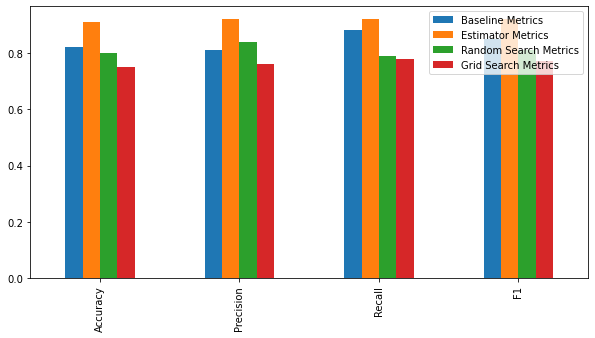

In [80]:
compare_metrics.plot.bar(figsize = (10 , 5));

### 6. Saving and loading our model

Two ways 
* 1. With Python ` Pickle module `
* 2. With ` joblib module `

**PICKLE MODULE**

In [87]:
# Splitting into X and y

X = heart_disease_shuffled.drop("target" , axis = 1)
y = heart_disease_shuffled["target"]

# Making the Train and Test splits

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2)

In [91]:
import pickle

# Saving the model

pickle.dump(gs_clf , open("GS_random_forest.pkl" , "wb")) # wb :- Write Binary

# Loading a Model

loaded_model = pickle.load(open("GS_random_forest.pkl" , "rb"))

# Using the loded model to make prediction

y_preds_saved = loaded_model.predict(X_test)

clf_predict(y_test , y_preds_saved)

Accuracy :- 88.52
Precision :- 0.89
Recall :- 0.92
f1 :- 0.91


{'Accuracy': 0.89, 'Precision': 0.89, 'Recall': 0.92, 'F1': 0.91}

**JOBLIB**

In [94]:
from joblib import dump , load

# Saving the model

dump(gs_clf , filename = "GS_MODEL.joblib")

# Loading the model 

load_model = load(filename = "GS_MODEL.JOBLIB")

# Using it to make predictions 

y_preds_save = load_model.predict(X_test)

# Metrics function

clf_predict(y_test , y_preds_save)


Accuracy :- 88.52
Precision :- 0.89
Recall :- 0.92
f1 :- 0.91


{'Accuracy': 0.89, 'Precision': 0.89, 'Recall': 0.92, 'F1': 0.91}

## Putting it all together 

* Lets use the SCIKIT's pipeline feature 

In [3]:
# Importing the Car sales data 

data = pd.read_csv("Data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
# Checking the data type

data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [6]:
# Checking if we have some missing values or not 

data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Steps we want to do ( All in a single cell )**

1. Filling in the missing data 
2. Converting all the data into numbers 
3. Builind a machine learning model over it

In [32]:
# Getting the data ready 

import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Calling our Modelling part

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV

# Setting up the random seed

import numpy as np
np.random.seed(42)

# Importing our data 

data = pd.read_csv("Data/car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"] , inplace = True )

# Defining different features and Making our Transformer pipeline

categorical_features = ["Make" , "Colour"]
categorical_transformer = Pipeline(steps = [
    ( "imputer" , SimpleImputer(strategy = "constant" , fill_value = "missing")),
    ( "onehot" , OneHotEncoder(handle_unknown = "ignore"))
])

door_features = ["Doors"]
door_transformer = Pipeline ( steps = [
    (" imputer " , SimpleImputer ( strategy = "constant" , fill_value = 4))
])

num_features = ["Odometer (KM)"]
num_transformer = Pipeline(steps = [
    ("imputer" , SimpleImputer( strategy = "mean"))   
])

# Setting up the preprocessing steps ( Filling Missing value and converting to numerical values)

preprocessor = ColumnTransformer( transformers = [
    ("cat" , categorical_transformer , categorical_features),
    ("door" , door_transformer , door_features),
    ("num" , num_transformer , num_features) # Read as num equal num_tranformer on num_faetures
])

# Creating Preprocessing and modeling Pipelien combined

'''
model = Pipeline( steps = [
    ("model" , RandomForestRegressor()),
    ("data_preprocessing" , preprocessor)
])
'''
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Splitting our data

X = data.drop("Price" , axis = 1)
y = data["Price"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Fitting the data and scoring it

model.fit(X_train , y_train)
model.score(X_test , y_test)

0.22188417408787875

In [34]:
# Using GridSearchCV or RandomSearchCV with our Regression Model
# imputer__ because we are acessing another parameter inside the imputer string
# model__n_est becaues we directly accessing the paramater we can write n_estimators after the function call also
pipe_grid = {
    
    "preprocessor__num__imputer__strategy" : ["mean" , "median"],
    "model__n_estimators" : [10,100,500],
    "model__max_depth" : [None , 5],
    "model__max_features" : ["auto"],
    "model__min_samples_split" : [2,4],
    "model__min_samples_leaf" : [1,2]
}

gs_model = GridSearchCV(model , pipe_grid , cv = 5 , verbose = 2)
gs_model.fit(X_train , y_train)
gs_model.score(X_test , y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, prepr

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median; total time=  

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END mod

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END mode

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END mod

0.3257411226580156